In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='FreeSans')

In [2]:
meta = pd.read_csv('../data/meta.csv').sample(frac=1.0, random_state=42)
N = len(meta)
train_meta, val_meta = meta.iloc[: int(0.8 * N)], meta.iloc[int(0.8 * N) :]

In [3]:
angles = []
for id in val_meta['id'].values:
    angles.append( np.load(f'../data/npy/{id}.npy') )
angles = np.concatenate(angles, axis=0)

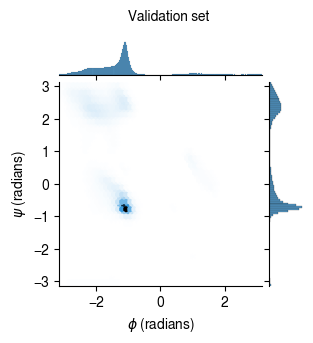

In [23]:
g = sns.jointplot(
    x=angles[:, 0],
    y=angles[:, 1],
    xlim=(-np.pi, np.pi),
    ylim=(-np.pi, np.pi),
    kind='hex',
    gridsize=50,
    height=3,
)

g.ax_joint.set_xlabel('$\phi$ (radians)')
g.ax_joint.set_ylabel('$\psi$ (radians)')

plt.suptitle('Validation set', y=1.05, fontsize=10)
plt.savefig('rep_figures/ramachandran.png', dpi=300, bbox_inches='tight')

In [6]:
import torch
generated = torch.load('../test_64res.pt')

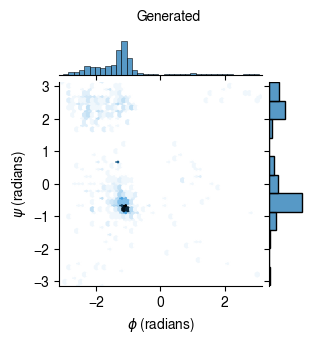

In [22]:
g = sns.jointplot(
    x=generated[:, -1, :, 0].flatten(),
    y=generated[:, -1, :, 1].flatten(),
    xlim=(-np.pi, np.pi),
    ylim=(-np.pi, np.pi),
    kind='hex',
    gridsize=50,
    height=3,
)

g.ax_joint.set_xlabel('$\phi$ (radians)')
g.ax_joint.set_ylabel('$\psi$ (radians)')

plt.suptitle('Generated', y=1.05, fontsize=10)
plt.savefig('rep_figures/ramachandran_generated.png', dpi=300, bbox_inches='tight')